# Smart Nutrition Disorder Specialist Bot

## Environment Setup

In [1]:
import os
import sys

# Add the src directory to the system path
sys.path.append(os.path.abspath("../src"))

In [2]:
# Imports
from IPython.display import (Image, 
                             display)

from agent.tool import agentic_rag
from agent.workflow import WORKFLOW_APP
from agent.nutrition_bot import NutritionBot
from utils.guardrail import filter_input_with_llama_guard

import warnings
warnings.filterwarnings('ignore')

Failed to send telemetry event ClientStartEvent: capture() takes 1 positional argument but 3 were given
Failed to send telemetry event ClientCreateCollectionEvent: capture() takes 1 positional argument but 3 were given


## Initializing and Using the AI Nutrition Disorder Specailaist Agent

The intelligent Nutrition Disorder Specialist agent has been developed to deliver accurate, context-aware responses. Built on a Retrieval Augmented Generation (RAG) framework, the system incorporates key components such as a well-defined agent state, query expansion techniques for enhanced retrieval, and seamless integration with a vector store to fetch relevant contextual information.

The response generation pipeline is implemented, supported by mechanisms to evaluate groundedness and precision. Iterative refinement loops for both queries and responses have been established to ensure consistently high-quality outputs. To safeguard interactions, Llama Guard has been integrated, enforcing robust safety protocols throughout user engagement.

The agent is capable of addressing nutrition disorder-related queries with contextual relevance, factual accuracy, and conversational safety.

### Visualising the Flow

A visual representation of the workflow in the form of a flowchart using the workflow graph.

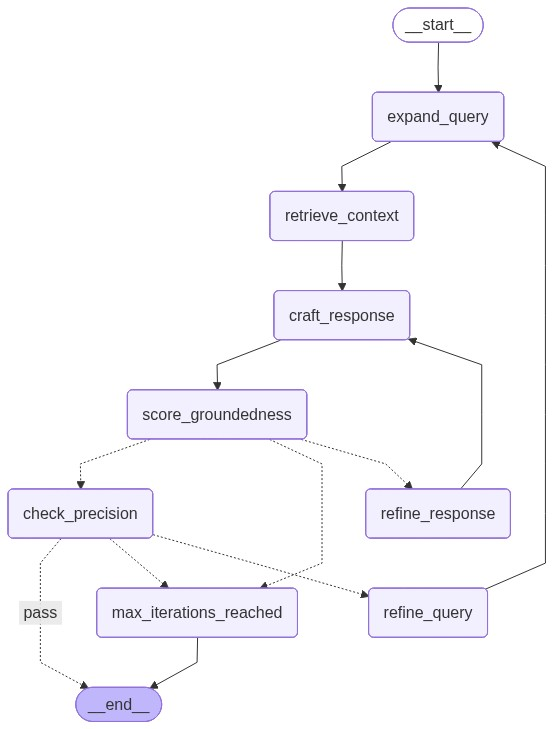

In [3]:
display(Image(WORKFLOW_APP.get_graph().draw_mermaid_png()))

### Testing the Agentic RAG Tool

In [4]:
agentic_rag.invoke("What are the potential causes of inadequate nutrient absorption in elderly patients?")

-------------------- expand_query --------------------
 expanded_query What are the potential causes of inadequate nutrient absorption in elderly patients, including specific conditions such as celiac disease, Crohn's disease, and lactose intolerance, as well as factors like age-related changes in gastrointestinal function, medications that affect nutrient absorption, and deficiencies in specific vitamins and minerals like vitamin B12, iron, and calcium?
-------------------- retrieve_context --------------------


Failed to send telemetry event CollectionQueryEvent: capture() takes 1 positional argument but 3 were given


-------------------- craft_response --------------------
 Intermediate response: content="Inadequate nutrient absorption in elderly patients can arise from multiple factors, including:\n\n1. **Gastrointestinal Disorders**: Conditions such as chronic pancreatitis, inflammatory bowel disease, or gastrointestinal infections can impair the digestive process. These disorders can inhibit the proper breakdown and absorption of nutrients, particularly fat-soluble vitamins (A, D, E, K) and certain minerals.\n\n2. **Medications**: Certain medications can interfere with nutrient absorption. For example, antacids may reduce the absorption of vitamin B12 by altering gastric acidity, while metformin can affect the absorption of vitamin B12 and lead to deficiencies over time.\n\n3. **Aging-Related Changes**: The aging process itself can lead to decreased gastric acid production, which is necessary for the absorption of various nutrients, including vitamin B12 and calcium. Additionally, changes in the

{'query': 'What are the potential causes of inadequate nutrient absorption in elderly patients?',
 'expanded_query': "What are the potential causes of inadequate nutrient absorption in elderly patients, including specific conditions such as celiac disease, Crohn's disease, and lactose intolerance, as well as factors like age-related changes in gastrointestinal function, medications that affect nutrient absorption, and deficiencies in specific vitamins and minerals like vitamin B12, iron, and calcium?",
 'context': [{'content': '1. What are the potential causes of inadequate absorption in the gastrointestinal tract?\n2. How can chronic pancreatitis lead to malabsorption syndromes?\n3. What role do certain medications, such as antacids and metformin, play in nutritional deficiencies?\n4. What genetic disorders are associated with malabsorption in the ileum, and what nutrients are typically affected?\n5. How does repeated exposure to nitrous oxide impact nutrient absorption and overall nu

### Chatbot Setup

In [5]:
def nutrition_disorder_agent():
    """
    A conversational agent that answers nutrition disorder-related questions
    using a RAG-based workflow with safety filtering and user session handling.
    """

    print("Welcome to the Nutrition Disorder Specialist Agent!")
    print("You can ask me anything about nutrition disorders, such as symptoms, causes, treatments, and more.")
    print("Type 'exit' to end the conversation.\n")

    chatbot = NutritionBot()                        # Initialize chatbot instance
    print("Login by providing customer name")
    user_id = input()                               # Get user ID for tracking conversation sessions

    while True:
        # Get user input
        print("How can I help you?")
        user_query = input("You: ")

        # Define the logic for exitting the loop
        if user_query.lower() == "exit":
            print("Agent: Goodbye! Feel free to return if you have more questions.")
            break

        # Filter input through Llama Guard - returns "SAFE" or "UNSAFE"
        filtered_result = filter_input_with_llama_guard(user_query)
        filtered_result = filtered_result.replace("\n", " ")                        # Normalize the result
        print(filtered_result)

        # Need to by pass some cases like "S6" and "S7" so that it can work effectively.
        if filtered_result in ["safe", "unsafe S6", "unsafe S7"]:
            # Process the user query using the RAG workflow
            try:
                # Call chatbot handler function
                response = chatbot.handle_customer_query(user_id, user_query)
                print(f"Agent: {response}\n")

            except Exception as e:
                print("Agent: Sorry, I encountered an error while processing your query. Please try again.")
                print(f"Error: {e}\n")
        else:
            print("Agent: I apologize, but I cannot process that input as it may be inappropriate. Please try again.")

In [6]:
nutrition_disorder_agent()

Welcome to the Nutrition Disorder Specialist Agent!
You can ask me anything about nutrition disorders, such as symptoms, causes, treatments, and more.
Type 'exit' to end the conversation.

Login by providing customer name
How can I help you?
safe
CONTEXT:  Previous relevant interactions:
Customer: Vitamin C deficiency causes the nutritional disorder scurvy
Support: Vitamin C deficiency causes the nutritional disorder scurvy
---
Customer: Scurvy can develop due to a diet low in fruits and vegetables or lifestyle factors like smoking
Support: Scurvy can develop due to a diet low in fruits and vegetables or lifestyle factors like smoking
---
Customer: Scurvy results from insufficient vitamin C intake which is essential for collagen synthesis
Support: Scurvy results from insufficient vitamin C intake which is essential for collagen synthesis
---
Customer: Symptoms of scurvy include fatigue, weakness, anemia, bleeding gums, joint pain, easy bruising, skin changes, swollen joints, and impair